In [1]:
import pandas as pd
import numpy as np
import gc
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing

## 1. Read numeric and labels data set from the extracted folder

In [2]:
path='../../Data/Extracted/'

train=pd.read_csv(path+'train.csv').select_dtypes(exclude='object')
test=pd.read_csv(path+'test.csv').select_dtypes(exclude='object')

labels=pd.read_csv(path+'labels.csv')
for feat in labels.columns:
    labels[feat],_=pd.factorize(labels[feat],sort=True)

C:\Users\pushk\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Fill na values by median

In [3]:
train.fillna(train.median(),inplace=True)
test.fillna(test.median(),inplace=True)

## 3. KMeans clustering to bin numeric features

In [4]:
from sklearn import cluster

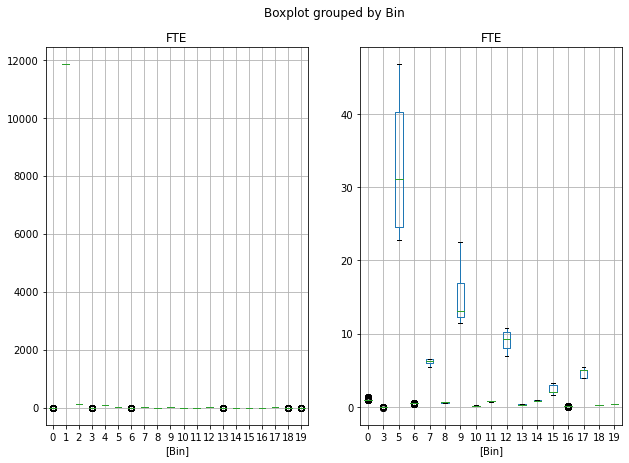

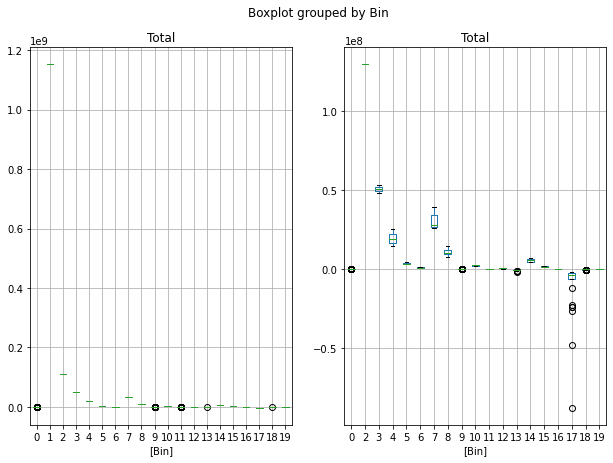

In [5]:
bins=[20,20]
test_binned_data={}
train_binned_data={}
for pair in tqdm(zip(train.columns,bins)):
    feat=pair[0]
    k=pair[1]
    # Axis initialization
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,7))
    
    # Cluster
    cls=cluster.KMeans(n_clusters=k)
    # Fit on test set
    cls.fit(test[feat].to_frame())
    # Convert numeric values into categories or bins
    test_binned_data[feat]=cls.labels_
    pd.DataFrame(zip(test[feat].values,test_binned_data[feat]),columns=[feat,'Bin']).boxplot(by='Bin',ax=ax[0])
    
    # Predict on train numeric feature to convert it into categories or bins
    train_binned_data[feat]=cls.predict(train[feat].to_frame())
    pd.DataFrame(zip(train[feat].values,train_binned_data[feat]),columns=[feat,'Bin']).boxplot(by='Bin',ax=ax[1])

## 4. Prepare data frames from binned_data_dict

In [6]:
def ohe_data(binned_data_dict):
    '''One hot encodes binned_data_dict after converting it into pandas data frame'''
    
    ohe=preprocessing.OneHotEncoder(sparse=False)
    return pd.DataFrame(ohe.fit_transform(pd.DataFrame(binned_data_dict)))
    
train_df=ohe_data(train_binned_data)
test_df=ohe_data(test_binned_data)

In [7]:
for feat in list(set(test_df.columns)-set(train_df.columns)):
    train_df[feat]=[0]*train_df.shape[0]

## 5. Save data frames into extracted folder

In [8]:
train_df.to_csv(path+'train_binned_numeric_data.csv',index=False)
test_df.to_csv(path+'test_binned_numeric_data.csv',index=False)